In [17]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage


In [28]:
# Remove rows with missing labels
data = data.dropna(subset=['Star Rating for health team gave care in a professional way'])

# Re-extract features and labels
features = data[['Percent of patients who reported that their home health team gave care in a professional way',
                 'Percent of patients who reported that their home health team communicated well with them',
                 'Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them',
                 'Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)',
                 'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family']]

labels = data['Star Rating for health team gave care in a professional way']

# Convert to numeric, forcing errors to NaN
features = features.apply(pd.to_numeric, errors='coerce')
labels = pd.to_numeric(labels, errors='coerce')

# Drop any rows with NaNs in features or labels
features.dropna(inplace=True)
labels = labels.loc[features.index]  # Align labels with features


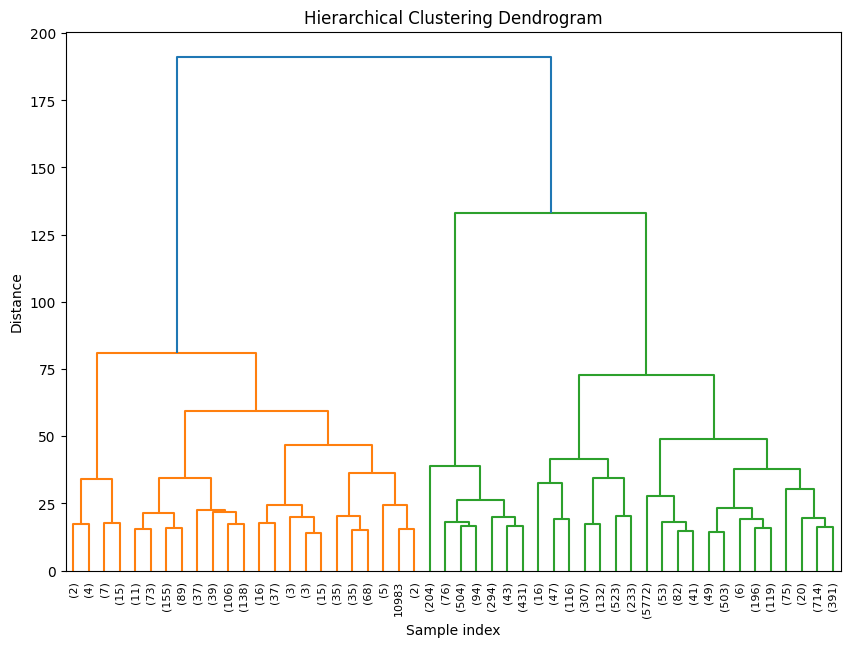

In [20]:
# Perform hierarchical clustering
Z = linkage(scaled_features, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=50, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [32]:
# Combine features and labels into a single DataFrame for easy alignment
data_combined = features.copy()
data_combined['label'] = labels

# Drop rows where 'label' is NaN
data_combined = data_combined.dropna(subset=['label'])

# Extract features and labels again
features = data_combined.drop(columns=['label'])
labels = data_combined['label']

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


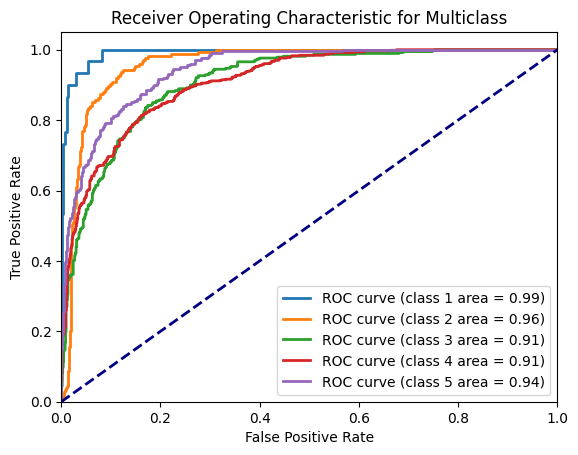

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the labels for multiclass classification
y_train_binarized = label_binarize(y_train, classes=[1, 2, 3, 4, 5])
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y_train_binarized.shape[1]

# Train Naive Bayes classifier with One-vs-Rest strategy
model = OneVsRestClassifier(GaussianNB())
model.fit(X_train, y_train_binarized)

# Make predictions
y_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i+1} area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")
plt.show()


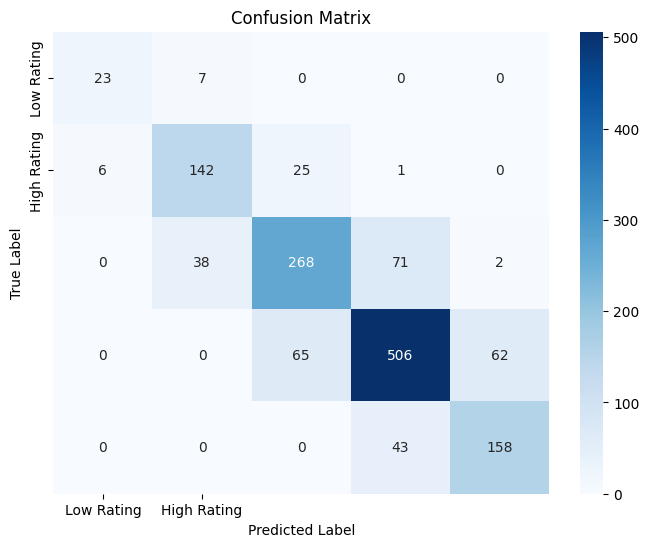

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Rating', 'High Rating'],
            yticklabels=['Low Rating', 'High Rating'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


<Figure size 1000x700 with 0 Axes>

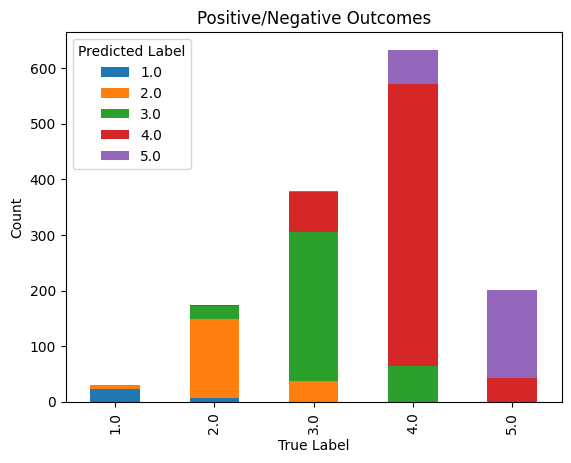

In [38]:
# Positive and Negative Outcomes
results = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred, 'Probability': y_prob})
outcomes = results.groupby(['True Label', 'Predicted Label']).size().unstack()

plt.figure(figsize=(10, 7))
outcomes.plot(kind='bar', stacked=True)
plt.title('Positive/Negative Outcomes')
plt.xlabel('True Label')
plt.ylabel('Count')
plt.show()
